<h1>Check Dataset<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#Path" data-toc-modified-id="Path-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Path</a></span></li><li><span><a href="#DEF-plot_template" data-toc-modified-id="DEF-plot_template-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>DEF plot_template</a></span></li></ul></li><li><span><a href="#Check-Dataset" data-toc-modified-id="Check-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check Dataset</a></span><ul class="toc-item"><li><span><a href="#IMAGE" data-toc-modified-id="IMAGE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>IMAGE</a></span></li><li><span><a href="#det.txt" data-toc-modified-id="det.txt-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>det.txt</a></span></li><li><span><a href="#gt.txt" data-toc-modified-id="gt.txt-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>gt.txt</a></span></li></ul></li><li><span><a href="#END" data-toc-modified-id="END-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>END</a></span></li></ul></div>

## Config

### import

In [30]:
import os
import sys
import pathlib
import re
import pprint

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Path

In [8]:
ROOT_Path = pathlib.Path(os.getcwd()).parents[0]
_Path = ROOT_Path
assert _Path.exists(), "Not exists. : {}".format(str(_Path))
print(_Path)

/media/pollenjp/DATA2TB/workdir/git/MOT-Dataset


In [9]:
train_Path = ROOT_Path / "data" / "raw" / "MOT16" / "train"
_Path = train_Path
assert _Path.exists(), "Not exists. : {}".format(str(_Path))
print(_Path)

/media/pollenjp/DATA2TB/workdir/git/MOT-Dataset/data/raw/MOT16/train


In [15]:
pprint.pprint(os.listdir(str(train_Path)))

['MOT16-10',
 'MOT16-04',
 'MOT16-02',
 'MOT16-13',
 'MOT16-09',
 'MOT16-05',
 'MOT16-11']


### DEF plot_template

In [17]:
def plot_template(plot_array_list, nrows, ncols, idx, fig):
    """template plot function

    Args:
         plot_array_list (list of tuple(str, numpy.array)) : list of a set of the title and numpy.array
         nrows (int) : the number of rows
         ncols (int) : the number of columns
         idx (int) :
         fig (matpltlib.pyplot.figure) :

    Doc Style : google, http://www.sphinx-doc.org/ja/stable/ext/example_google.html#example-google
    """
    for (_name, _im) in plot_array_list:
        idx += 1
        ax = fig.add_subplot(nrows, ncols, idx)
        ax.imshow(_im)
        ax.set_title(label="{}'s shape:{}".format(_name, _im.shape))
        ax.set_xlabel(xlabel="im[1]")
        ax.set_ylabel(ylabel="im[0]")
    #===================================
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

## Check Dataset

### IMAGE

In [32]:
image_dir_Path = train_Path / "MOT16-02" / "img1"
image_path_list = [
    os.path.join(os.path.abspath(_dirpath), _filename)
    for _dirpath, _dirnames, _filenames in os.walk(str(image_dir_Path))
    for _filename in _filenames
    if re.search(pattern=r'^(?!.*^\.).*\.(png|bmp|jpg|tif)',
                 string=_filename,
                 flags=re.IGNORECASE) is not None
]  # .(ピリオド)で始まるファイルを無視

print("len(image_path_list) : {}".format(len(image_path_list)))
image_path_list = sorted(image_path_list)

len(image_path_list) : 600


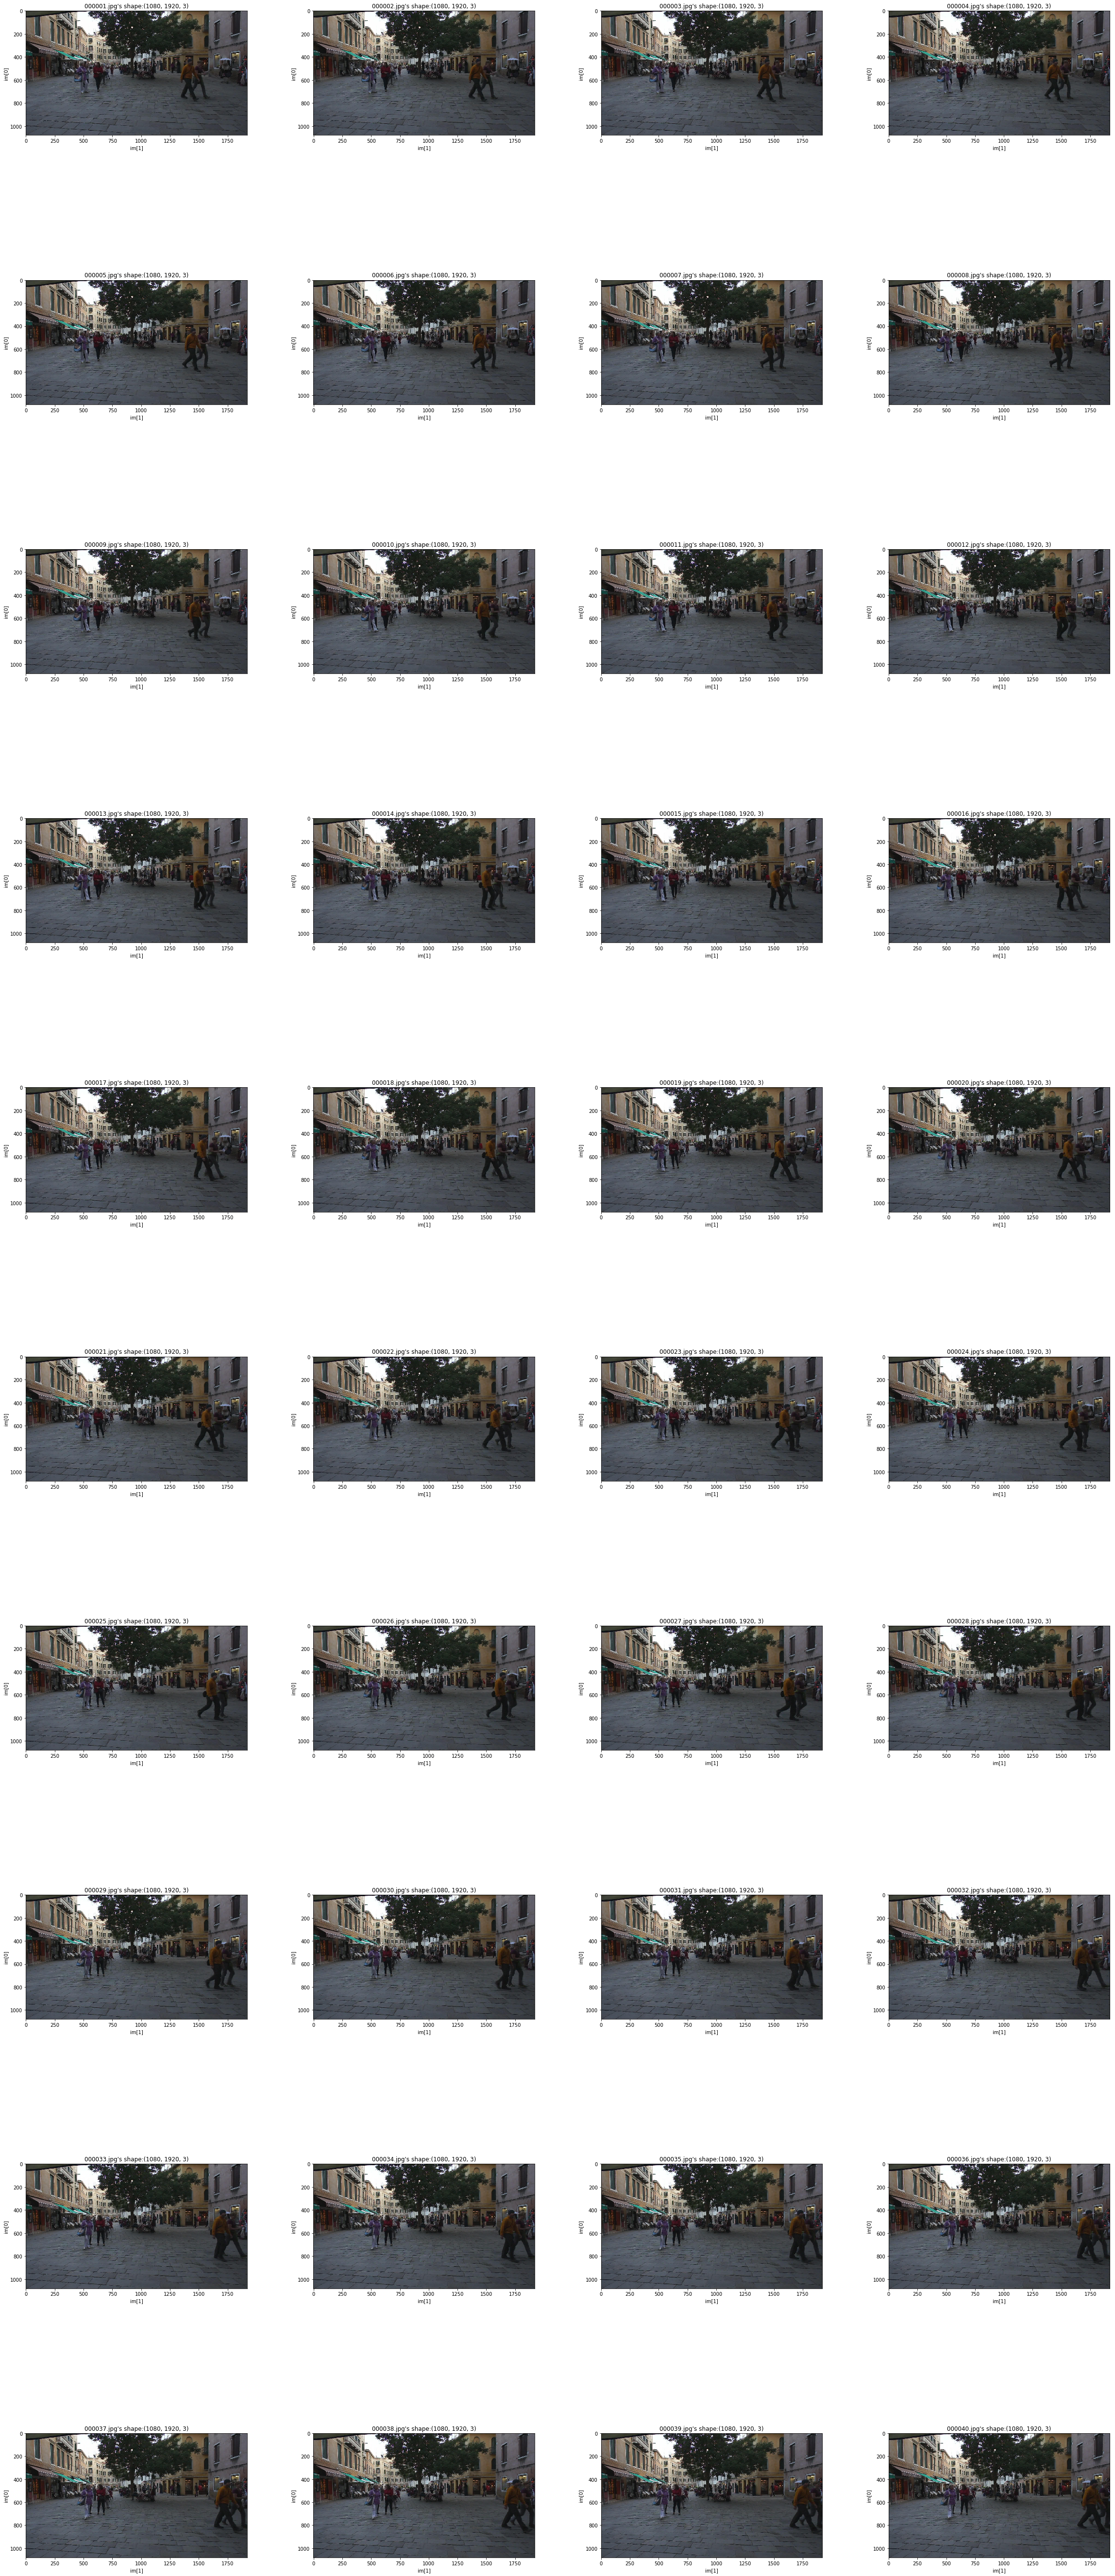

In [42]:
_image_path_list = image_path_list[:40]

plot_array_list = []
for i, _path in enumerate(_image_path_list):
    _im = cv2.imread(filename=_path, flags=cv2.IMREAD_COLOR)
    assert _im is not None, "Could not open or find the image : {}".format(_path)
    _name = "{}".format(os.path.basename(_path))
    plot_array_list.append((_name, _im[:,:,::-1]))

ncols = 4
nrows = len(plot_array_list) // 4 + 1
nrows += 1 if len(plot_array_list) % ncols == 0 else 0
nrows, ncols, idx = nrows, ncols, 0
fig = plt.figure(figsize=(ncols*10, nrows*10))
#=======================================
plot_template(plot_array_list=plot_array_list, nrows=nrows, ncols=ncols, idx=idx, fig=fig)

### det.txt
何かしらの検出器によって得られたbboxの情報

```
<frame>, <id>, <bb_left>, <bb_top>, <bb_width>, <bb_height>, <conf>, <x>, <y>, <z>
```

- `conf`
    - For the ground truth and results, it acts as a flag whether the entry is to be considered.
    - A value of 0 means that this particular instance is ignored in the evaluation, while any other value can be used to mark it as active.
- `x,y,z` are ignored for the 2D challenge and can be filled with -1.

In [45]:
det_filePath = train_Path / "MOT16-02" / "det" / "det.txt"
_Path = det_filePath
assert _Path.exists(), "Not exists. : {}".format(str(_Path))
print(_Path)

/media/pollenjp/DATA2TB/workdir/git/MOT-Dataset/data/raw/MOT16/train/MOT16-02/det/det.txt


In [59]:
det_list = []
with open(file=str(det_filePath), mode='rt') as f:
    while True:
        line = f.readline()
        if len(line) == 0:
            break
        line = line.rstrip()
        frame_num, _, bbox_xmin, bbox_ymin, bbox_w, bbox_h, conf, *_ = line.split(",")
        detection = [
            int(frame_num),
            float(bbox_xmin),
            float(bbox_ymin),
            float(bbox_w),
            float(bbox_h),
            float(conf),
        ]
        det_list.append(detection)
print("{:<20s} : {}".format("len(det_list)", len(det_list)))
print("{:<20s} : {}, {}, {}, {}, {}, {}".format("det_list[0]", "frame_num", "bbox_xmin", "bbox_ymin", "bbox_w", "bbox_h", "conf"))
print("{:<20s} : {}".format("det_list[0]", det_list[0]))

len(det_list)        : 29193
det_list[0]          : frame_num, bbox_xmin, bbox_ymin, bbox_w, bbox_h, conf
det_list[0]          : [1, 912.0, 484.0, 97.0, 109.0, 0.0]


### gt.txt
正解データ

In [62]:
gt_filePath = train_Path / "MOT16-02" / "gt" / "gt.txt"
_Path = gt_filePath
assert _Path.exists(), "Not exists. : {}".format(str(_Path))
print(_Path)

/media/pollenjp/DATA2TB/workdir/git/MOT-Dataset/data/raw/MOT16/train/MOT16-02/gt/gt.txt


In [64]:
gt_list = []
with open(file=str(gt_filePath), mode='rt') as f:
    while True:
        line = f.readline()
        if len(line) == 0:
            break
        line = line.rstrip()
        frame_num, obj_id, xmin, ymin, w, h, entry_flag, class_type, visibility = line.split(",")
        gt_bbox = [
            int(frame_num),
            int(obj_id),
            int(xmin),
            int(ymin),
            int(w),
            int(h),
            int(entry_flag),
            int(class_type),
            float(visibility)
        ]
        gt_list.append(gt_bbox)
print("{:<20s} : {}".format("len(gt_list)", len(gt_list)))
print("{:<20s} : {}".format("gt_list[0]", gt_list[0]))

len(gt_list)         : 29193
gt_list[0]           : [1, 1, 912, 484, 97, 109, 0, 7, 1.0]


## END